**Business** **Understanding**:
SEOUL Bike sharing demand prediction Problem Description:- Currently rental bikes are introduced in many urban cities for the enhancement of mobility comfort.It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time.Eventually,providing the city with a stable supply of rental bikes becomes a major concern.The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes. DATA DESCRIPTION:- The dataset contains weather information, the number of bikes rented per hour and date information.

In [1]:
#Importing necessary liabraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
from datetime import datetime
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [2]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

In [3]:
df = pd.read_csv('/content/drive/MyDrive/regreesion/SeoulBikeData.csv', encoding='latin-1')


In [4]:
df

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
0     No Holiday             Yes  
1     No Holiday             Yes  
2     No Holiday             Yes  
3     No Holiday             Yes  
4     No Holiday             Yes  
...          ...             ...  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes  

[8760 rows x 14 columns]

In [ ]:
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [ ]:
df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

In [ ]:
# printing unique values of columns to understand the features
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [ ]:
# descrpitive statistical data of numerical columns
df.describe().T

count         mean         std   min     25%  \
Rented Bike Count          8760.0   704.602055  644.997468   0.0  191.00   
Hour                       8760.0    11.500000    6.922582   0.0    5.75   
Temperature(°C)            8760.0    12.882922   11.944825 -17.8    3.50   
Humidity(%)                8760.0    58.226256   20.362413   0.0   42.00   
Wind speed (m/s)           8760.0     1.724909    1.036300   0.0    0.90   
Visibility (10m)           8760.0  1436.825799  608.298712  27.0  940.00   
Dew point temperature(°C)  8760.0     4.073813   13.060369 -30.6   -4.70   
Solar Radiation (MJ/m2)    8760.0     0.569111    0.868746   0.0    0.00   
Rainfall(mm)               8760.0     0.148687    1.128193   0.0    0.00   
Snowfall (cm)              8760.0     0.075068    0.436746   0.0    0.00   

                               50%      75%      max  
Rented Bike Count           504.50  1065.25  3556.00  
Hour                         11.50    17.25    23.00  
Temperature(°C)              13.70    22.50    39.40  
Humidity(%)                  57.00    74.00    98.00  
Wind speed (m/s)              1.50     2.30     7.40  
Visibility (10m)           1698.00  2000.00  2000.00  
Dew point temperature(°C)     5.10    14.80    27.20  
Solar Radiation (MJ/m2)       0.01     0.93     3.52  
Rainfall(mm)                  0.00     0.00    35.00  
Snowfall (cm)                 0.00     0.00     8.80

In [ ]:
# Checking the correlation between variables
df.corr()

Rented Bike Count      Hour  Temperature(°C)  \
Rented Bike Count                   1.000000  0.410257         0.538558   
Hour                                0.410257  1.000000         0.124114   
Temperature(°C)                     0.538558  0.124114         1.000000   
Humidity(%)                        -0.199780 -0.241644         0.159371   
Wind speed (m/s)                    0.121108  0.285197        -0.036252   
Visibility (10m)                    0.199280  0.098753         0.034794   
Dew point temperature(°C)           0.379788  0.003054         0.912798   
Solar Radiation (MJ/m2)             0.261837  0.145131         0.353505   
Rainfall(mm)                       -0.123074  0.008715         0.050282   
Snowfall (cm)                      -0.141804 -0.021516        -0.218405   

                           Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
Rented Bike Count            -0.199780          0.121108          0.199280   
Hour                         -0.241644          0.285197          0.098753   
Temperature(°C)               0.159371         -0.036252          0.034794   
Humidity(%)                   1.000000         -0.336683         -0.543090   
Wind speed (m/s)             -0.336683          1.000000          0.171507   
Visibility (10m)             -0.543090          0.171507          1.000000   
Dew point temperature(°C)     0.536894         -0.176486         -0.176630   
Solar Radiation (MJ/m2)      -0.461919          0.332274          0.149738   
Rainfall(mm)                  0.236397         -0.019674         -0.167629   
Snowfall (cm)                 0.108183         -0.003554         -0.121695   

                           Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
Rented Bike Count                           0.379788                 0.261837   
Hour                                        0.003054                 0.145131   
Temperature(°C)                             0.912798                 0.353505   
Humidity(%)                                 0.536894                -0.461919   
Wind speed (m/s)                           -0.176486                 0.332274   
Visibility (10m)                           -0.176630                 0.149738   
Dew point temperature(°C)                   1.000000                 0.094381   
Solar Radiation (MJ/m2)                     0.094381                 1.000000   
Rainfall(mm)                                0.125597                -0.074290   
Snowfall (cm)                              -0.150887                -0.072301   

                           Rainfall(mm)  Snowfall (cm)  
Rented Bike Count             -0.123074      -0.141804  
Hour                           0.008715      -0.021516  
Temperature(°C)                0.050282      -0.218405  
Humidity(%)                    0.236397       0.108183  
Wind speed (m/s)              -0.019674      -0.003554  
Visibility (10m)              -0.167629      -0.121695  
Dew point temperature(°C)      0.125597      -0.150887  
Solar Radiation (MJ/m2)       -0.074290      -0.072301  
Rainfall(mm)                   1.000000       0.008500  
Snowfall (cm)                  0.008500       1.000000

# **Pre-processing the data set**

In [ ]:
# Check for missing values in each column
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
# Checking for presence of any duplicate values
len(df[df.duplicated])

0

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day_name()


In [ ]:
df.head(1)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-01-12                254     0             -5.2           37   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  year  month       day  
0             Yes  2017      1  Thursday

In [ ]:
#creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
df['weekdays_weekend'] = df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )

df = df.drop(columns=['Date','day','year'],axis=1)

In [ ]:
df.head(1)

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  month  \
0           0.0            0.0  Winter  No Holiday             Yes      1   

   weekdays_weekend  
0                 0

In [ ]:
# Checking the value counts of new column
df['weekdays_weekend'].value_counts()

0    6216
1    2544
Name: weekdays_weekend, dtype: int64

In [ ]:
# Checking unique values
df.nunique()

Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
month                          12
weekdays_weekend                2
dtype: int64

In [ ]:
#Change the int64 column into catagory column
cols = ['Hour','month','weekdays_weekend']
for col in cols:
  df[col] =df[col].astype('category')

In [ ]:
# Understanding the data type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Rented Bike Count          8760 non-null   int64   
 1   Hour                       8760 non-null   category
 2   Temperature(°C)            8760 non-null   float64 
 3   Humidity(%)                8760 non-null   int64   
 4   Wind speed (m/s)           8760 non-null   float64 
 5   Visibility (10m)           8760 non-null   int64   
 6   Dew point temperature(°C)  8760 non-null   float64 
 7   Solar Radiation (MJ/m2)    8760 non-null   float64 
 8   Rainfall(mm)               8760 non-null   float64 
 9   Snowfall (cm)              8760 non-null   float64 
 10  Seasons                    8760 non-null   object  
 11  Holiday                    8760 non-null   object  
 12  Functioning Day            8760 non-null   object  
 13  month                      8760 n

In [ ]:
df['weekdays_weekend'].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [ ]:
print(df.columns)


Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'month', 'weekdays_weekend'],
      dtype='object')


In [ ]:
df.skew().sort_values(ascending=True)

Visibility (10m)             -0.701786
Dew point temperature(°C)    -0.367298
Temperature(°C)              -0.198326
Humidity(%)                   0.059579
Wind speed (m/s)              0.890955
Rented Bike Count             1.153428
Solar Radiation (MJ/m2)       1.504040
Snowfall (cm)                 8.440801
Rainfall(mm)                 14.533232
dtype: float64

# **EDA**

# **UNIVARIATE**

# **CATEGORICAL**

In [ ]:
df.describe(include="object").T

count unique         top  freq
Seasons          8760      4      Spring  2208
Holiday          8760      2  No Holiday  8328
Functioning Day  8760      2         Yes  8465

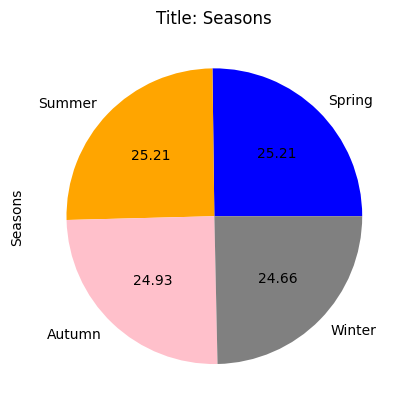

In [ ]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
df["Seasons"].value_counts()[:10].plot(kind='pie', autopct='%.2f', colors=[ 'blue', 'orange', 'pink','gray', 'cyan',])
plt.title("Title: Seasons")
plt.show()


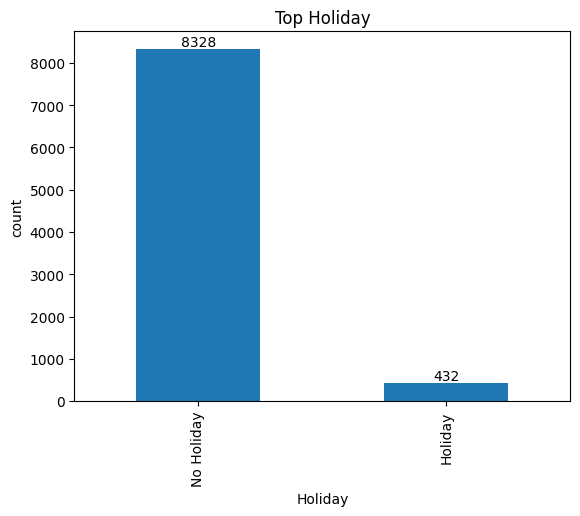

In [ ]:
ax=df['Holiday'].value_counts().plot(kind='bar')

for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10)

ax.set_xlabel('Holiday')

ax.set_ylabel("count")

ax.set_title('Top Holiday')
plt.xticks(rotation=90)
plt.show()

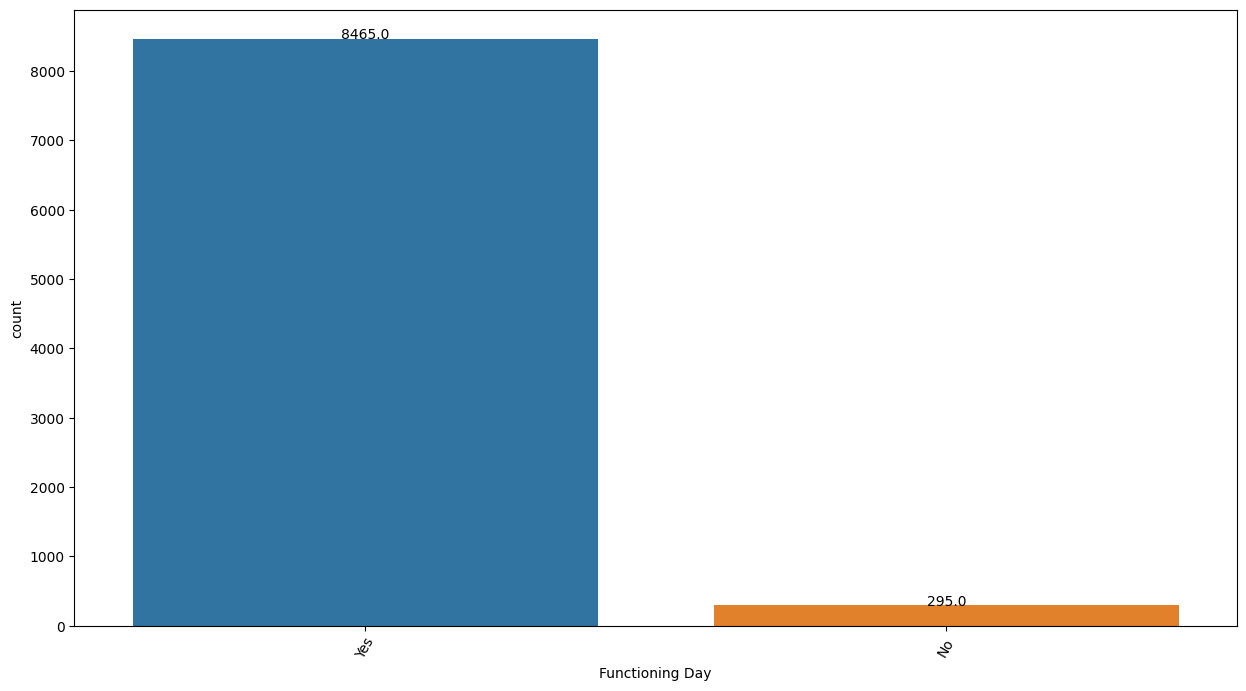

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.countplot(data=df,x="Functioning Day")


for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2,p.get_height() ),ha="center")


plt.xticks(rotation=60)
plt.show()

[Text(0.5, 1.0, 'Rented bikes - Month wise demand ')]

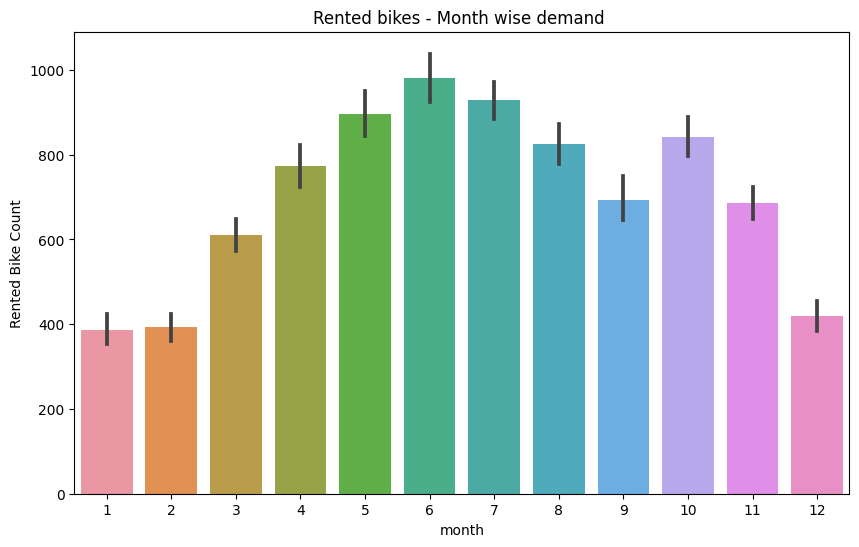

In [ ]:
# Data by vizualisation
fig,ax = plt.subplots(figsize = (10,6))
sns.barplot(data = df,x ='month',y = 'Rented Bike Count')
ax.set(title = 'Rented bikes - Month wise demand ')

[Text(0.5, 1.0, 'Rented bikes - Weekdays and weekend demand ')]

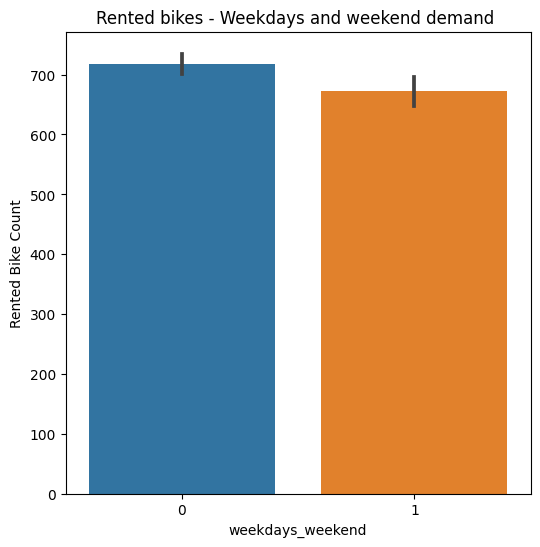

In [ ]:
fig,ax = plt.subplots(figsize = (6,6))
sns.barplot(data = df,x ='weekdays_weekend',y = 'Rented Bike Count')
ax.set(title = 'Rented bikes - Weekdays and weekend demand ')

[Text(0.5, 1.0, 'Count of Rented bikes during weekdays_weekend ')]

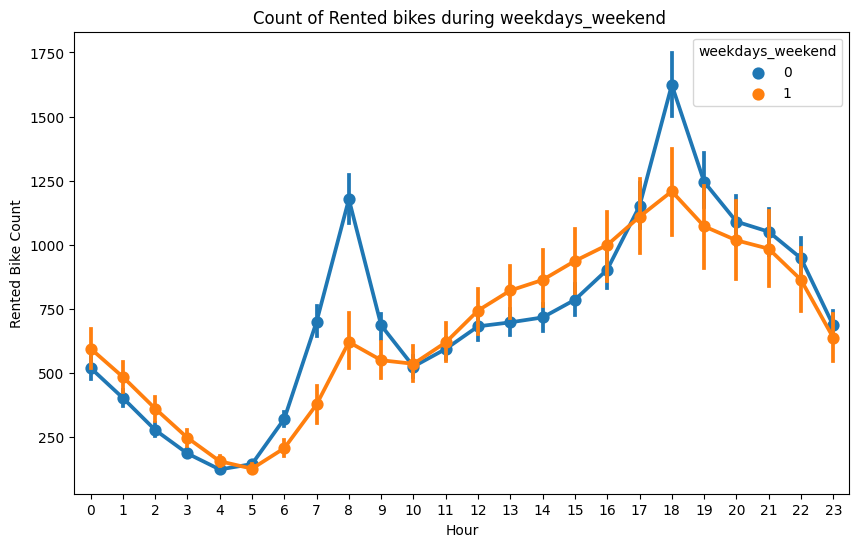

In [ ]:
#anlysis of data by vizualisation
fig,ax = plt.subplots(figsize = (10,6))
sns.pointplot(data = df,x='Hour',y='Rented Bike Count',hue = 'weekdays_weekend',ax = ax)
ax.set(title = 'Count of Rented bikes during weekdays_weekend ')

[Text(0.5, 1.0, 'Count of Rented bikes during weekdays_weekend ')]

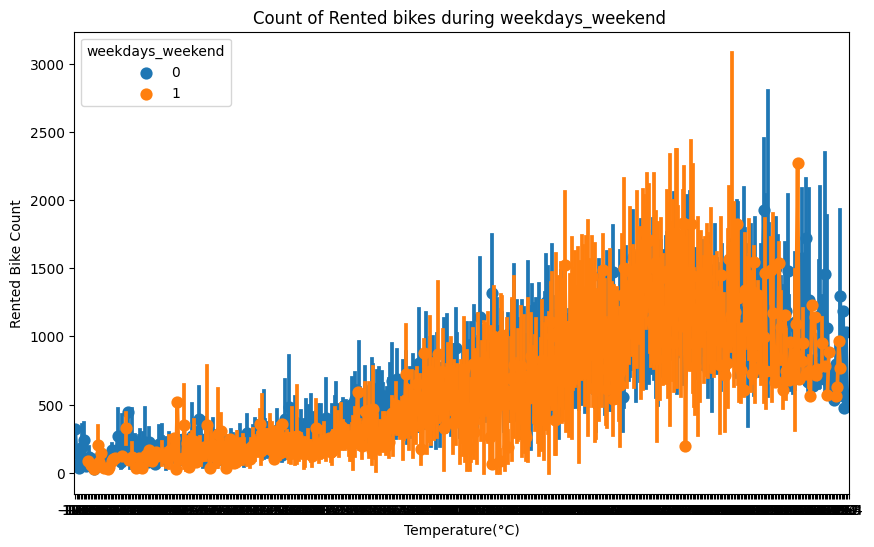

In [ ]:
fig,ax = plt.subplots(figsize = (10,6))
sns.pointplot(data = df,x='Temperature(°C)',y='Rented Bike Count',hue = 'weekdays_weekend',ax = ax)
ax.set(title = 'Count of Rented bikes during weekdays_weekend ')

In [ ]:
# numerical variables
numeric_features = df.describe().columns
numeric_features

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

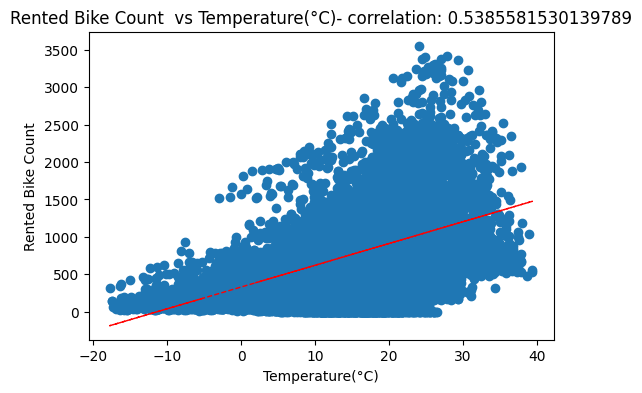

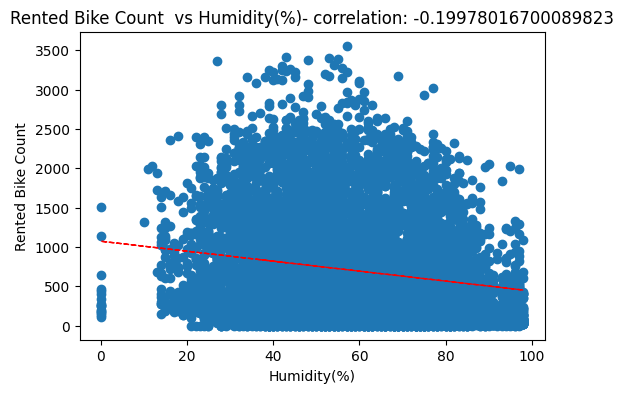

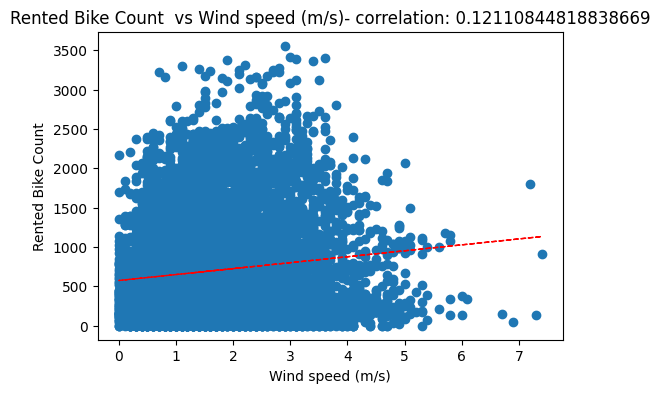

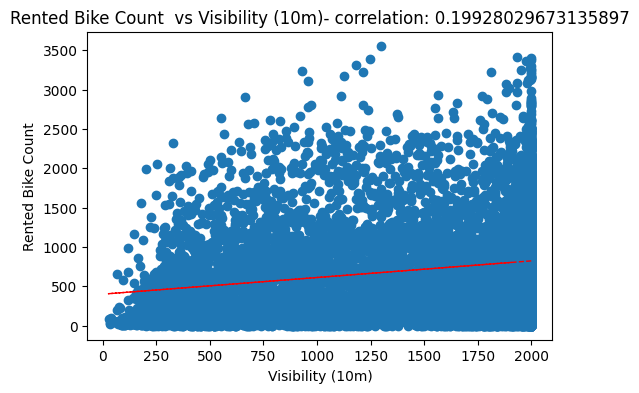

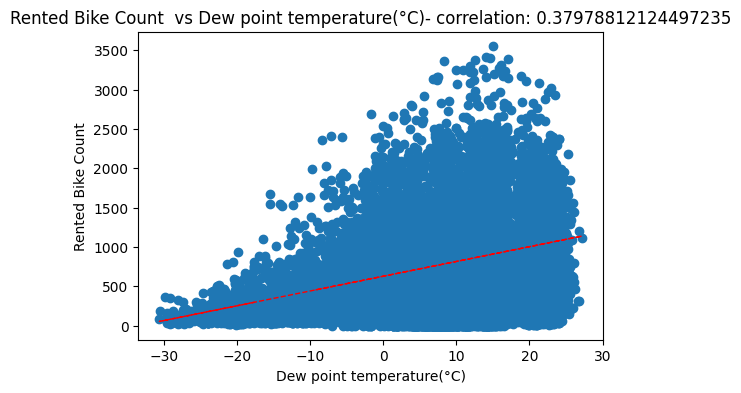

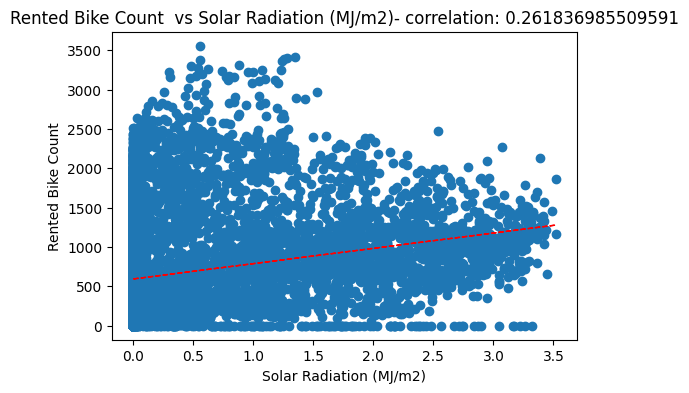

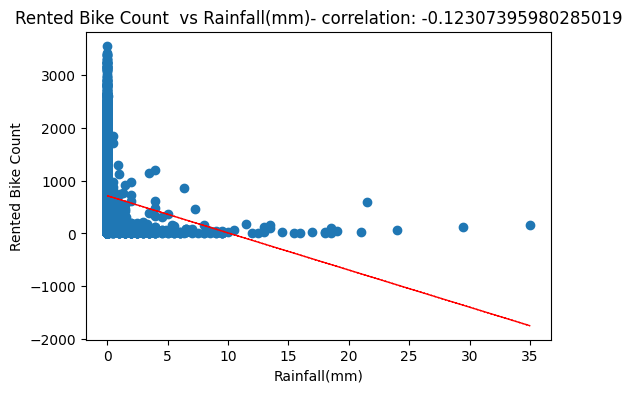

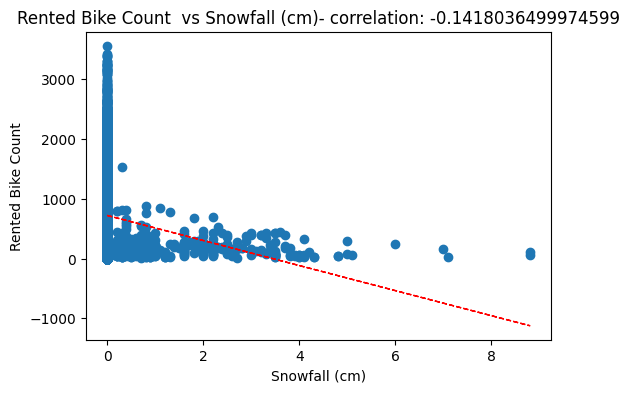

In [ ]:
# finding relationship bewtween target variable to each independent variable

for col in numeric_features[1:]:
    fig = plt.figure(figsize=(6, 4))
    ax = fig.gca()
    feature = df[col]
    label = df['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count  vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(df[col])
    #plt.plot(df[col], color='red',y_hat, "r--", lw=1)
    plt.plot(df[col], y_hat, color='red', linestyle='--', lw=1)
    plt.show()

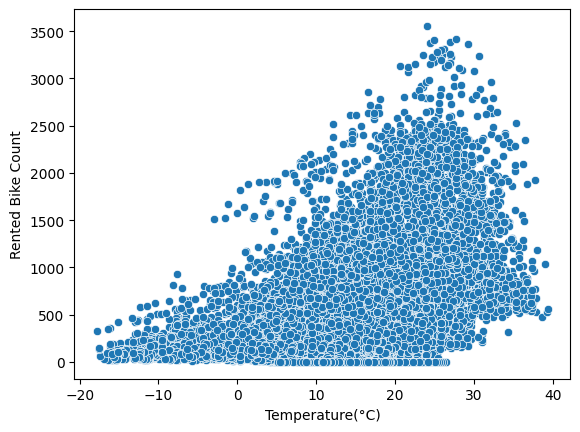

In [ ]:
sns.scatterplot(x=df["Temperature(°C)"],y=df["Rented Bike Count"]);

<Axes: xlabel='Temperature(°C)', ylabel='Dew point temperature(°C)'>

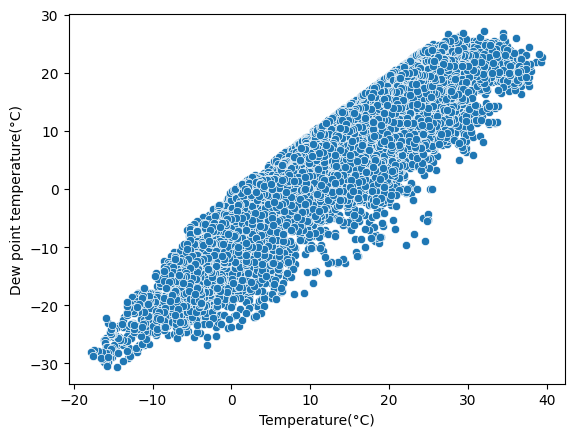

In [ ]:
sns.scatterplot(x=df["Temperature(°C)"],y=df["Dew point temperature(°C)"])

<Axes: xlabel='Dew point temperature(°C)', ylabel='Humidity(%)'>

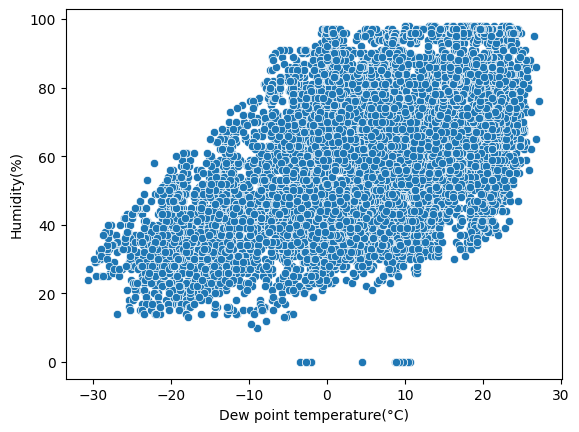

In [ ]:
sns.scatterplot(x=df["Dew point temperature(°C)"],y=df["Humidity(%)"])

<Axes: xlabel='Dew point temperature(°C)', ylabel='Temperature(°C)'>

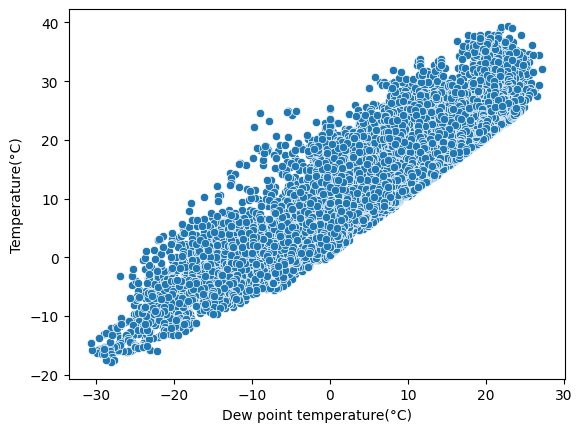

In [ ]:
sns.scatterplot(x=df["Dew point temperature(°C)"],y=df["Temperature(°C)"])

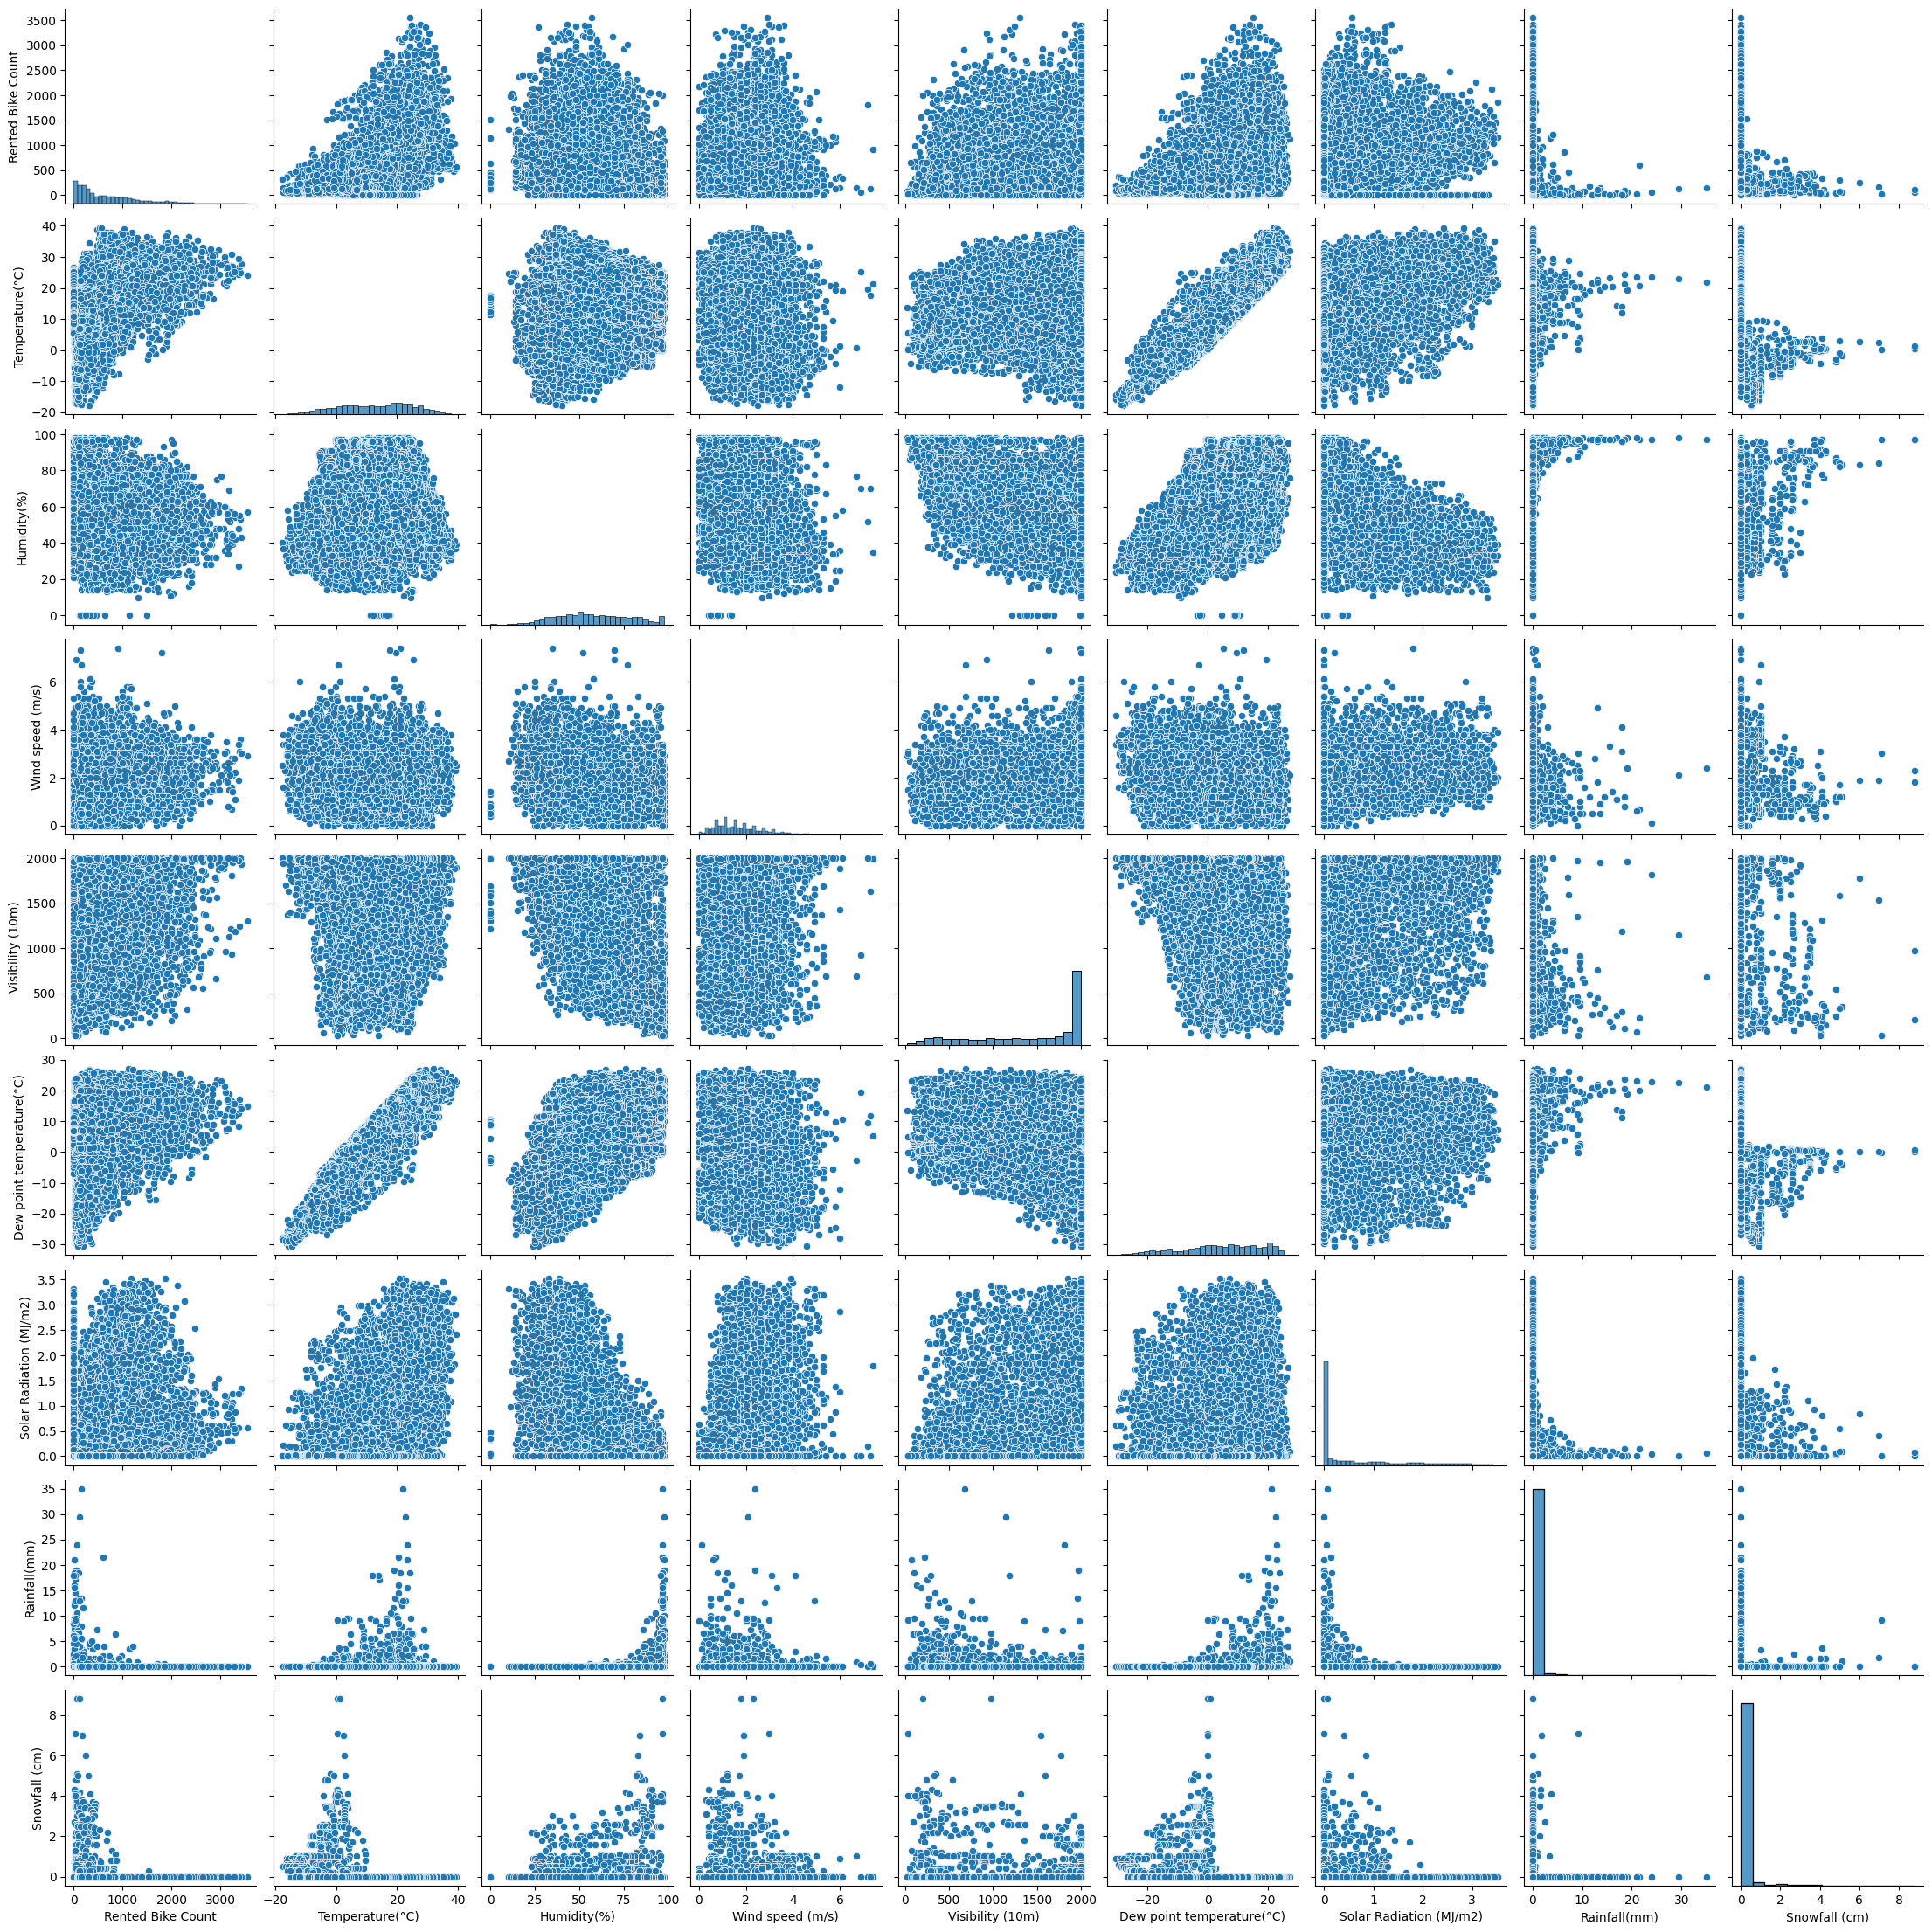

In [ ]:
sns.pairplot(df)   #finding relationship each variable
plt.show()

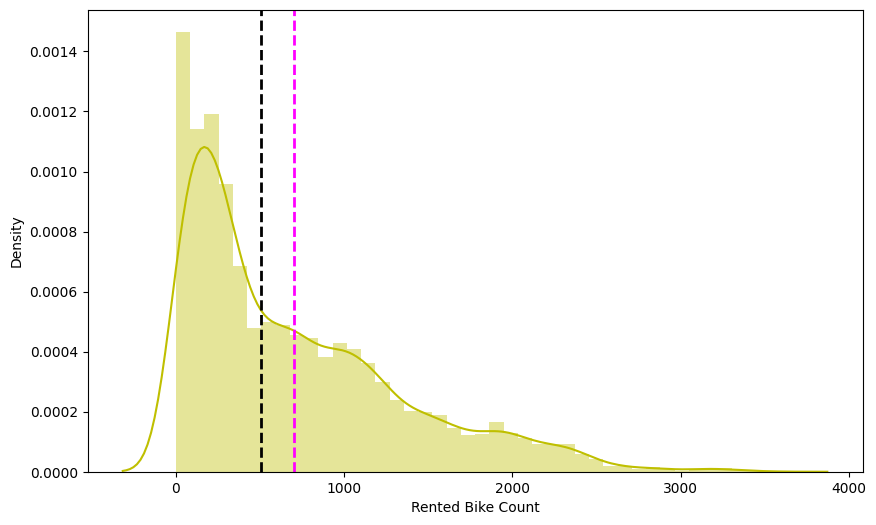

In [ ]:
#Distribution plot of Rented Bike Count
plt.figure(figsize=(10,6))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')
ax=sns.distplot(df['Rented Bike Count'],hist=True ,color="y")
ax.axvline(df['Rented Bike Count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(df['Rented Bike Count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

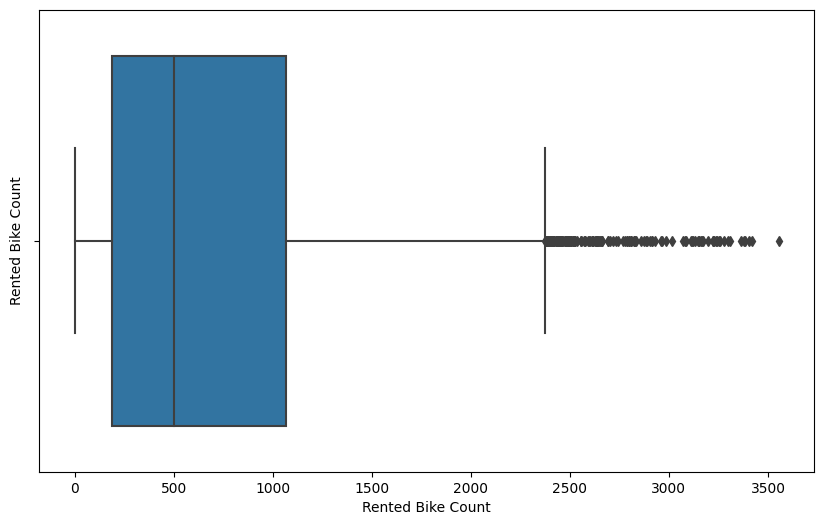

In [ ]:
#Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(10,6))
plt.ylabel('Rented Bike Count')
sns.boxplot(x=df['Rented Bike Count'])
plt.show()

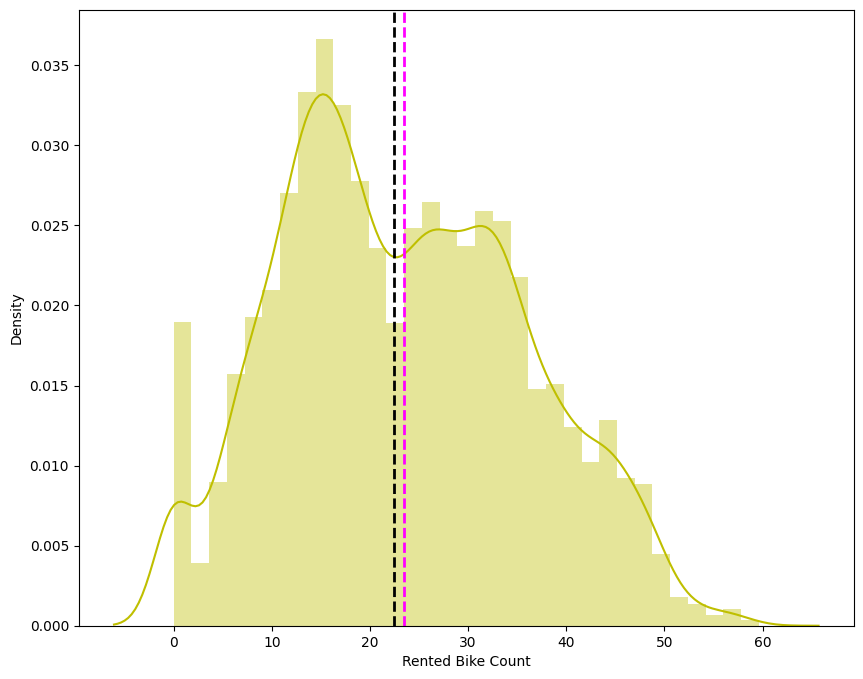

In [ ]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,8))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(df['Rented Bike Count']), color="y")
ax.axvline(np.sqrt(df['Rented Bike Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(df['Rented Bike Count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

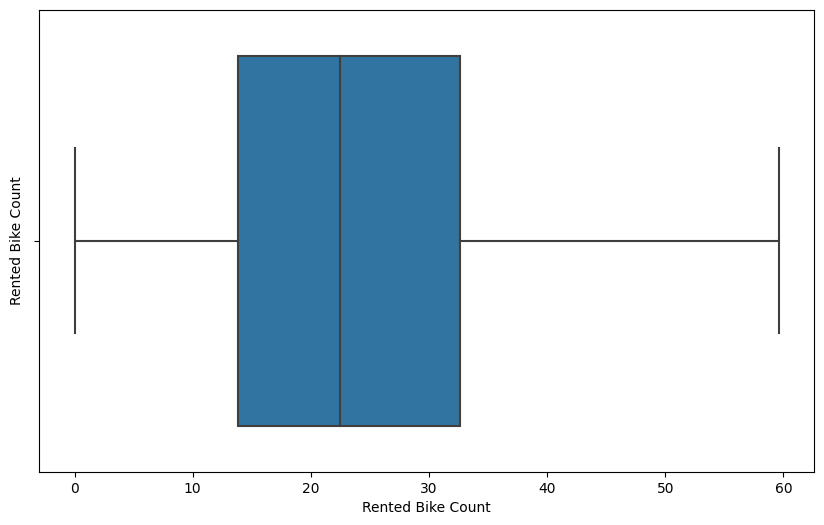

In [ ]:
# After applying sqrt on Rented Bike Count check whether we still have outliers
plt.figure(figsize=(10,6))
plt.ylabel('Rented Bike Count')
sns.boxplot(x=np.sqrt(df['Rented Bike Count']))
plt.show()

<Axes: >

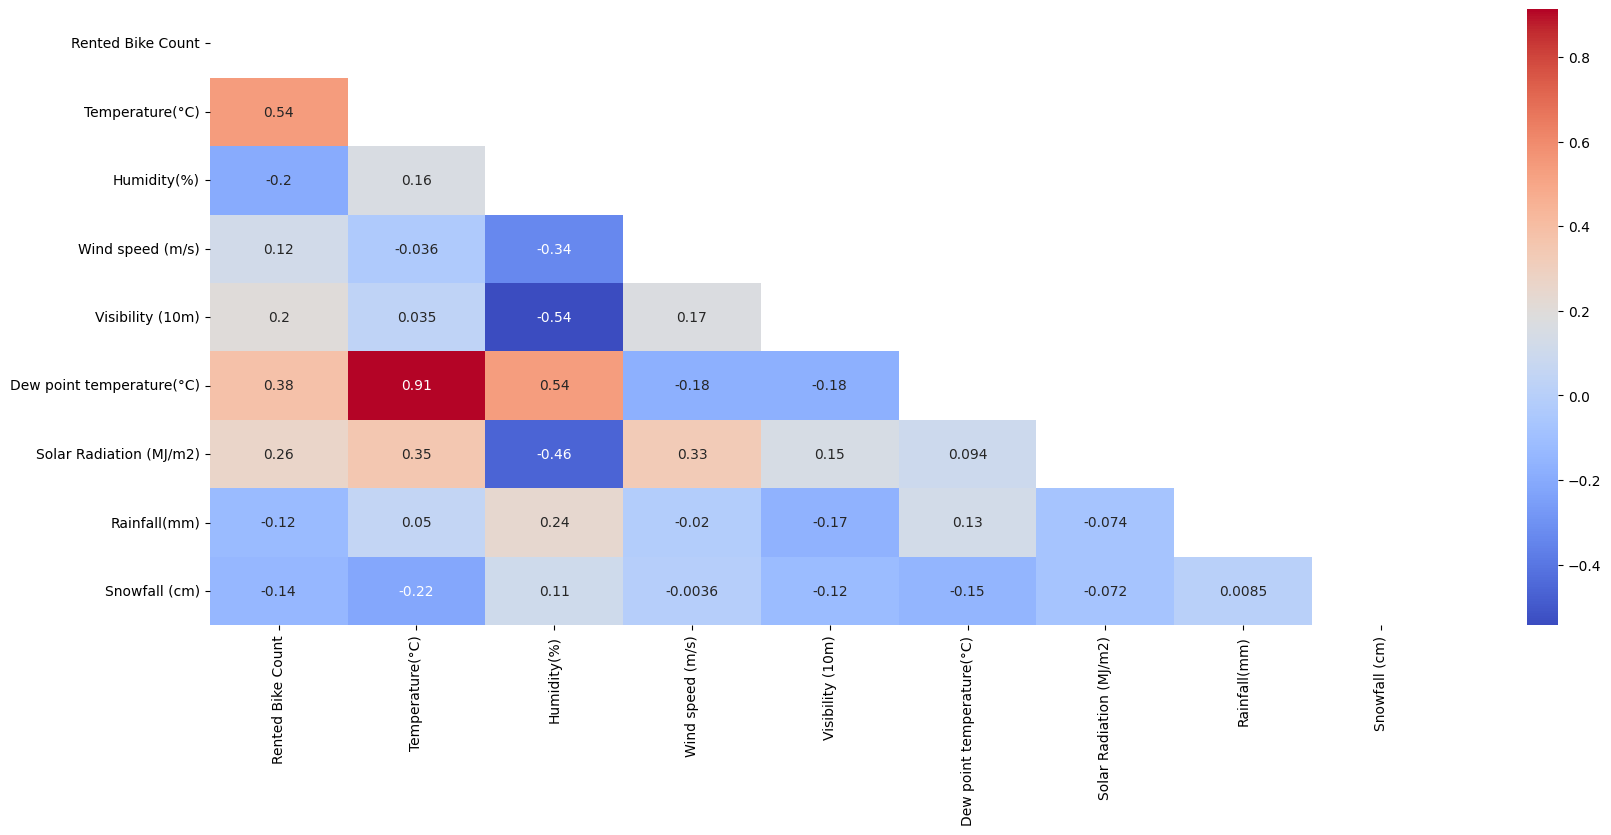

In [ ]:
## plot the Correlation matrix
plt.figure(figsize=(20,8))
correlation=df.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap((correlation),mask=mask, annot=True,cmap='coolwarm')

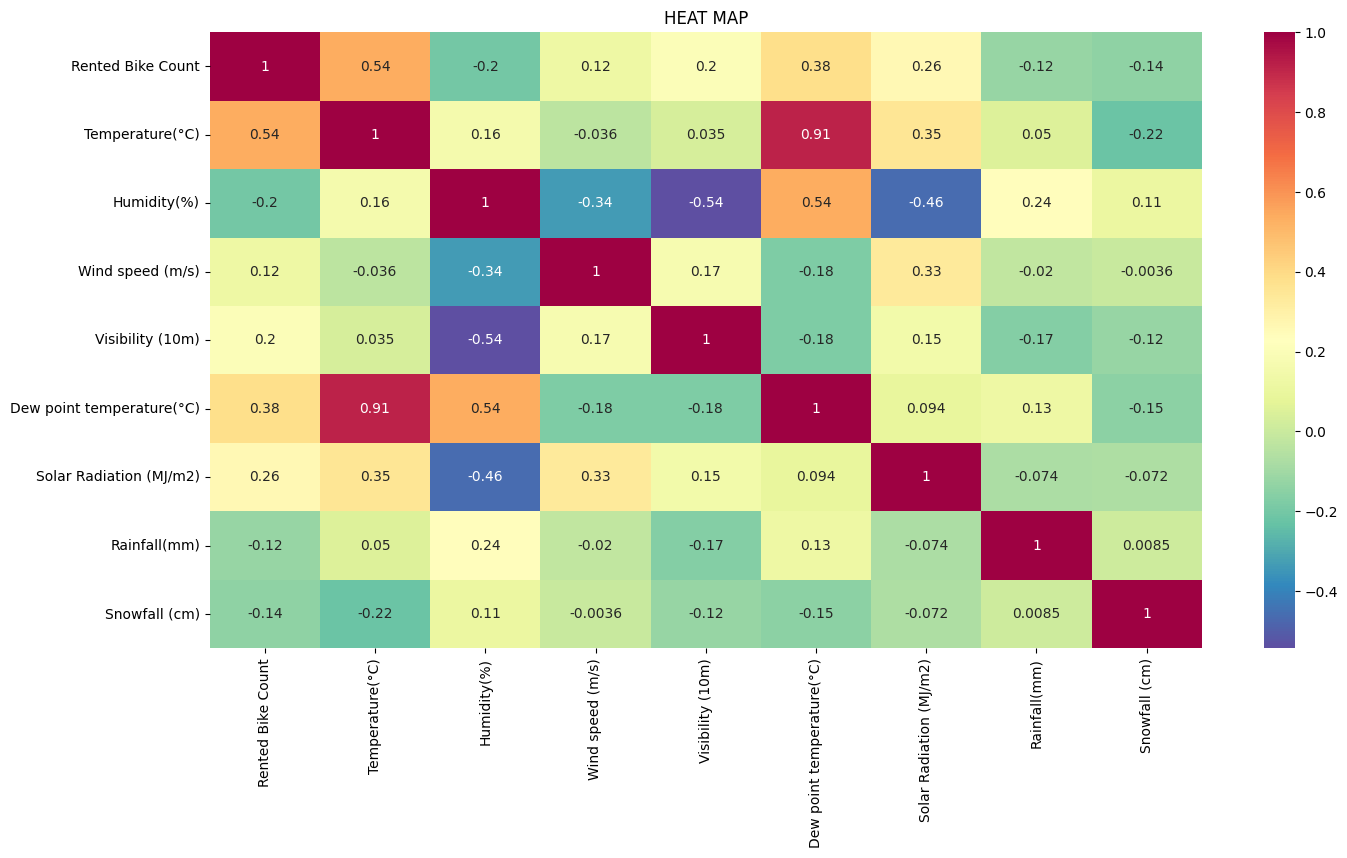

In [ ]:
# heat map showing correlationship between one variable to another variable
plt.figure (figsize= (16,8))
corelation= df.corr()
sns.heatmap(corelation, annot=True, cmap='Spectral_r')
plt.title("HEAT MAP")
plt.show()

In [ ]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
# finding multicollinearity to dropout that value
calc_vif(df[[i for i in df.describe().columns if i not in ["Rented Bike Count"]]])

variables        VIF
0            Temperature(°C)  29.075866
1                Humidity(%)   5.069743
2           Wind speed (m/s)   4.517664
3           Visibility (10m)   9.051931
4  Dew point temperature(°C)  15.201989
5    Solar Radiation (MJ/m2)   2.821604
6               Rainfall(mm)   1.079919
7              Snowfall (cm)   1.118903

In [ ]:
# finding multicollinear and dropout that value
calc_vif(df[[i for i in df.describe().columns if i not in ["Rented Bike Count","Temperature(°C)"]]])

variables       VIF
0                Humidity(%)  5.049297
1           Wind speed (m/s)  4.265415
2           Visibility (10m)  4.623490
3  Dew point temperature(°C)  1.655311
4    Solar Radiation (MJ/m2)  1.901297
5               Rainfall(mm)  1.079157
6              Snowfall (cm)  1.111247

In [ ]:
# finding multicollinear and dropout that value
calc_vif(df[[i for i in df.describe().columns if i not in ["Rented Bike Count","Temperature(°C)","Functioning Day"]]])

variables       VIF
0                Humidity(%)  5.049297
1           Wind speed (m/s)  4.265415
2           Visibility (10m)  4.623490
3  Dew point temperature(°C)  1.655311
4    Solar Radiation (MJ/m2)  1.901297
5               Rainfall(mm)  1.079157
6              Snowfall (cm)  1.111247

In [ ]:
# finding multicollinear and dropout that value
calc_vif(df[[i for i in df.describe().columns if i not in ["Rented Bike Count","Temperature(°C)","Functioning Day","Holiday"]]])

variables       VIF
0                Humidity(%)  5.049297
1           Wind speed (m/s)  4.265415
2           Visibility (10m)  4.623490
3  Dew point temperature(°C)  1.655311
4    Solar Radiation (MJ/m2)  1.901297
5               Rainfall(mm)  1.079157
6              Snowfall (cm)  1.111247

In [ ]:
# selected features
numerical_features = ["Humidity(%)","Wind speed (m/s)","Visibility (10m)","Dew point temperature(°C)","Solar Radiation (MJ/m2)","Rainfall(mm)","Snowfall (cm)"]

In [ ]:
# extending of features
features = numerical_features.copy()
features.extend(["Seasons","Holiday","Functioning Day"])

In [ ]:
# importig label encoder and convert categorical to numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in df.columns:
    if df[i].dtype=="object":
        df[i]=le.fit_transform(df[i])
i

'weekdays_weekend'

In [ ]:
# these are selected features
features

['Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day']

In [ ]:
# copying of data in another variable
df_pr=df.copy()
df_pr

Rented Bike Count Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                   254    0             -5.2           37               2.2   
1                   204    1             -5.5           38               0.8   
2                   173    2             -6.0           39               1.0   
3                   107    3             -6.2           40               0.9   
4                    78    4             -6.0           36               2.3   
...                 ...  ...              ...          ...               ...   
8755               1003   19              4.2           34               2.6   
8756                764   20              3.4           37               2.3   
8757                694   21              2.6           39               0.3   
8758                712   22              2.1           41               1.0   
8759                584   23              1.9           43               1.3   

      Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0                 2000                      -17.6                      0.0   
1                 2000                      -17.6                      0.0   
2                 2000                      -17.7                      0.0   
3                 2000                      -17.6                      0.0   
4                 2000                      -18.6                      0.0   
...                ...                        ...                      ...   
8755              1894                      -10.3                      0.0   
8756              2000                       -9.9                      0.0   
8757              1968                       -9.9                      0.0   
8758              1859                       -9.8                      0.0   
8759              1909                       -9.3                      0.0   

      Rainfall(mm)  Snowfall (cm)  Seasons  Holiday  Functioning Day month  \
0              0.0            0.0        3        1                1     1   
1              0.0            0.0        3        1                1     1   
2              0.0            0.0        3        1                1     1   
3              0.0            0.0        3        1                1     1   
4              0.0            0.0        3        1                1     1   
...            ...            ...      ...      ...              ...   ...   
8755           0.0            0.0        0        1                1    11   
8756           0.0            0.0        0        1                1    11   
8757           0.0            0.0        0        1                1    11   
8758           0.0            0.0        0        1                1    11   
8759           0.0            0.0        0        1                1    11   

     weekdays_weekend  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  
...               ...  
8755                0  
8756                0  
8757                0  
8758                0  
8759                0  

[8760 rows x 15 columns]

In [ ]:
# all columns
df_pr.describe().columns

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# all features store into Variable Xdf_pr[features]
X=df_pr[features]
X

Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0              37               2.2              2000   
1              38               0.8              2000   
2              39               1.0              2000   
3              40               0.9              2000   
4              36               2.3              2000   
...           ...               ...               ...   
8755           34               2.6              1894   
8756           37               2.3              2000   
8757           39               0.3              1968   
8758           41               1.0              1859   
8759           43               1.3              1909   

      Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
0                         -17.6                      0.0           0.0   
1                         -17.6                      0.0           0.0   
2                         -17.7                      0.0           0.0   
3                         -17.6                      0.0           0.0   
4                         -18.6                      0.0           0.0   
...                         ...                      ...           ...   
8755                      -10.3                      0.0           0.0   
8756                       -9.9                      0.0           0.0   
8757                       -9.9                      0.0           0.0   
8758                       -9.8                      0.0           0.0   
8759                       -9.3                      0.0           0.0   

      Snowfall (cm)  Seasons  Holiday  Functioning Day  
0               0.0        3        1                1  
1               0.0        3        1                1  
2               0.0        3        1                1  
3               0.0        3        1                1  
4               0.0        3        1                1  
...             ...      ...      ...              ...  
8755            0.0        0        1                1  
8756            0.0        0        1                1  
8757            0.0        0        1                1  
8758            0.0        0        1                1  
8759            0.0        0        1                1  

[8760 rows x 10 columns]

In [ ]:
from sklearn.preprocessing import RobustScaler
# Scalling of features
scaler = RobustScaler()
# Sclaing
X= scaler.fit_transform(X)

In [ ]:
X

array([[-0.625     ,  0.5       ,  0.28490566, ...,  2.        ,
         0.        ,  0.        ],
       [-0.59375   , -0.5       ,  0.28490566, ...,  2.        ,
         0.        ,  0.        ],
       [-0.5625    , -0.35714286,  0.28490566, ...,  2.        ,
         0.        ,  0.        ],
       ...,
       [-0.5625    , -0.85714286,  0.25471698, ..., -1.        ,
         0.        ,  0.        ],
       [-0.5       , -0.35714286,  0.15188679, ..., -1.        ,
         0.        ,  0.        ],
       [-0.4375    , -0.14285714,  0.1990566 , ..., -1.        ,
         0.        ,  0.        ]])

In [ ]:
#dependent_variable=['Rented Bike Count']
#y=df_pr[dependent_variable].values # or

y = df_pr["Rented Bike Count"]
y

0        254
1        204
2        173
3        107
4         78
        ... 
8755    1003
8756     764
8757     694
8758     712
8759     584
Name: Rented Bike Count, Length: 8760, dtype: int64

# **TRAINING THE MODEL**

In [ ]:
# importing necessary liabraries
from sklearn.model_selection import train_test_split
import math

In [ ]:
#Assign the value in X and Y
X = df_pr.drop(columns=['Rented Bike Count'], axis=1)
y = np.sqrt(df_pr['Rented Bike Count'])


In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [ ]:
print(X_train.shape) # shape of X , y
print(y_train.shape)

(7008, 14)
(7008,)


In [ ]:
print(X_test.shape) # shape of X , y
print(y_test.shape)

(1752, 14)
(1752,)


# **LINEAR REGRESSION**

In [ ]:
# importing necessary libraries for
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [ ]:
# defining metrics

def print_metrics(actual, predicted):
    print('MSE is {}'.format(mean_squared_error(actual, predicted)))
    print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
    print('MAE is {}'.format(mean_absolute_error(actual, predicted)))

In [ ]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
regressor.intercept_ # intercept of linear regression B0

0.4163472825385419

In [ ]:
regressor.coef_       # coefficents of linear regression like B1,B2,B3,B4......

array([ 5.00554099e-01,  1.61387597e-01, -2.53918748e-01,  9.17366936e-02,
        2.40973087e-04,  4.12745823e-01, -7.24244843e-01, -1.58353699e+00,
        1.33421737e-01, -2.08803765e+00,  3.17765754e+00,  2.87941106e+01,
        1.30535488e-01, -6.57017755e-01])

In [ ]:
# Validating Assumptions
y_train_pred_lr = regressor.predict(X_train)
y_test_pred_lr = regressor.predict(X_test)

In [ ]:
print(y_test_pred_lr) # predicted values of y_test

[29.19869894 34.21335366 36.70306149 ... 28.20929707  6.76675627
 37.02284116]


In [ ]:
# actual y values
print(y_test)

6056    41.569219
5556    28.670542
5990    25.651511
7674    52.115257
3319    32.908965
          ...    
8307    11.045361
100      6.480741
6605    13.379088
1783    17.146428
6013    25.942244
Name: Rented Bike Count, Length: 1752, dtype: float64


In [ ]:
# comparison  actual y_test values, and  y_predicted_values

pd.DataFrame ({"Actual_Values":y_test, "Predicted_values":y_test_pred_lr,"Error_value":(y_test-y_test_pred_lr)})

Actual_Values  Predicted_values  Error_value
6056      41.569219         29.198699    12.370520
5556      28.670542         34.213354    -5.542811
5990      25.651511         36.703061   -11.051551
7674      52.115257         36.210053    15.905204
3319      32.908965         21.461896    11.447069
...             ...               ...          ...
8307      11.045361         19.607144    -8.561783
100        6.480741         11.320810    -4.840069
6605      13.379088         28.209297   -14.830209
1783      17.146428          6.766756    10.379672
6013      25.942244         37.022841   -11.080598

[1752 rows x 3 columns]

In [ ]:
# Evaluation of training Data
print_metrics(y_train, y_train_pred_lr)


#Find R-squared value
r2 = r2_score(y_train, y_train_pred_lr)
  # Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_train, y_train_pred_lr))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print(f"r2:{r2}")
print(f"Adj_r2:{adj_r2}")

MSE is 53.20499869559992
RMSE is 7.294175669367987
MAE is 5.574797535709617
r2:0.6573663329544441
Adj_r2:0.6566803796670657


In [ ]:
 #Test dataset metrics
print_metrics(y_test, y_test_pred_lr)

# evaluating test data
 #Find R-squared value
r2 = r2_score(y_test, y_test_pred_lr)
  # Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_test, y_test_pred_lr))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"r2:{r2}")
print(f"Adj_r2:{adj_r2}")

MSE is 55.69581173677535
RMSE is 7.462962664838633
MAE is 5.667992682807563
r2:0.6381428959617073
Adj_r2:0.6352263735342254


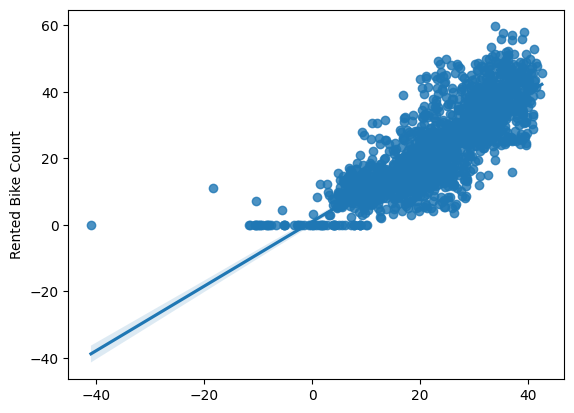

In [ ]:
sns.regplot( y=y_test,x=y_test_pred_lr);

# **LASSO REGRESSION**

In [ ]:
# Create an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.47647743109676377 0.472258771816244


In [ ]:
#get the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 81.94895615262985
RMSE : 9.052566274412458
MAE : 6.701721321265691
R2 : 0.472258771816244
Adjusted R2 : 0.46800524435822877


In [ ]:
## storing the test set metrics value in a dataframe for later comparison
training_df = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2_score', 'Adjusted R2'])

# Append values to the DataFrame
dict1 = {'Model': 'Linear Regression',
         'MAE': round((MAE_l), 3),
         'MSE': round((MSE_l), 3),
         'RMSE': round((RMSE_l), 3),
         'R2_score': round((r2_l), 3),
         'Adjusted R2': round((Adjusted_R2_l), 2)}

training_df = training_df.append(dict1, ignore_index=True)

# Print the DataFrame
print(training_df)

               Model    MAE     MSE   RMSE  R2_score  Adjusted R2
0  Linear Regression  6.702  81.949  9.053     0.472         0.47


In [ ]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 80.5788089060207
RMSE : 8.97656999672039
MAE : 6.6092362001072225
R2 : 0.47647743109676377
Adjusted R2 : 0.47225790549823454


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2),}
test_df=test_df.append(dict2,ignore_index=True)
print(test_df)

                       Model    MAE     MSE   RMSE  R2_score  Adjusted R2
0           Lasso Regression  5.668  55.695  7.463     0.638         0.64
1  Dicision tree regression   3.619  26.746  5.172     0.826         0.82
2  Random forest regression   2.313  12.518  3.538     0.919         0.92
3          Lasso regression   6.609  80.579  8.977     0.476         0.47


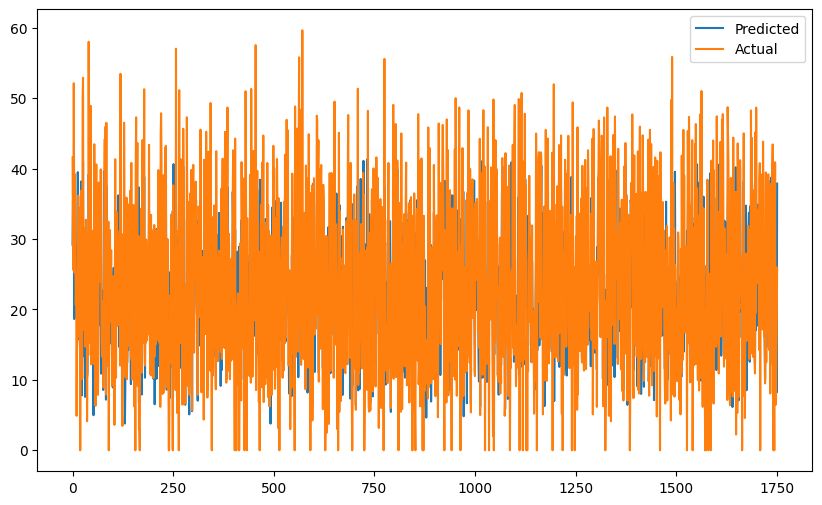

In [ ]:
#Plot the figure
plt.figure(figsize=(10,6))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

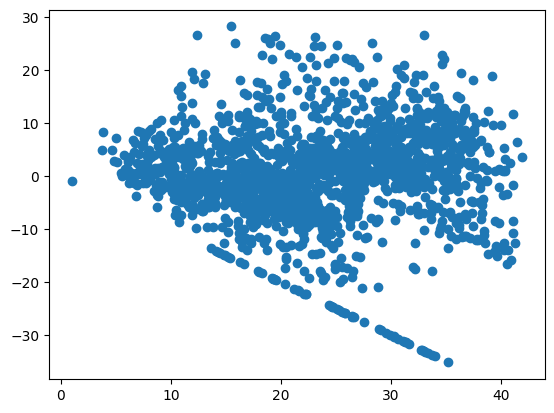

In [ ]:
### Heteroscadacity  relationship, the spread of residuals changes as the dependent variable's value changes
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))

# **RIDGE REGRESSION**

In [ ]:
#import the packages
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.1)

In [ ]:
#FIT THE MODEL
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
#check the score
ridge.score(X_train, y_train)

0.6573662975693939

In [ ]:
#get the X_train and X-test value
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [ ]:

#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 53.20500419027756
RMSE : 7.294176046016271
MAE : 5.5748366338640905
R2 : 0.6573662975693939
Adjusted R2 : 0.6546047133241271


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
df=df.append(dict1,ignore_index=True)
print(training_df)




               Model    MAE     MSE   RMSE  R2_score  Adjusted R2
0  Linear Regression  6.702  81.949  9.053     0.472         0.47


In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 55.694615503601945
RMSE : 7.462882519750793
MAE : 5.667975610981306
R2 : 0.6381506679190301
Adjusted R2 : 0.6352342081325398


In [ ]:

# Create an empty DataFrame
test_df = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2_score', 'Adjusted R2'])

# Append values to the DataFrame
dict2 = {'Model': 'Lasso Regression',
         'MAE': round((MAE_r), 3),
         'MSE': round((MSE_r), 3),
         'RMSE': round((RMSE_r), 3),
         'R2_score': round((r2_r), 3),
         'Adjusted R2': round((Adjusted_R2_r), 2)}

test_df = test_df.append(dict2, ignore_index=True)

# Print the DataFrame
print(test_df)


              Model    MAE     MSE   RMSE  R2_score  Adjusted R2
0  Lasso Regression  5.668  55.695  7.463     0.638         0.64


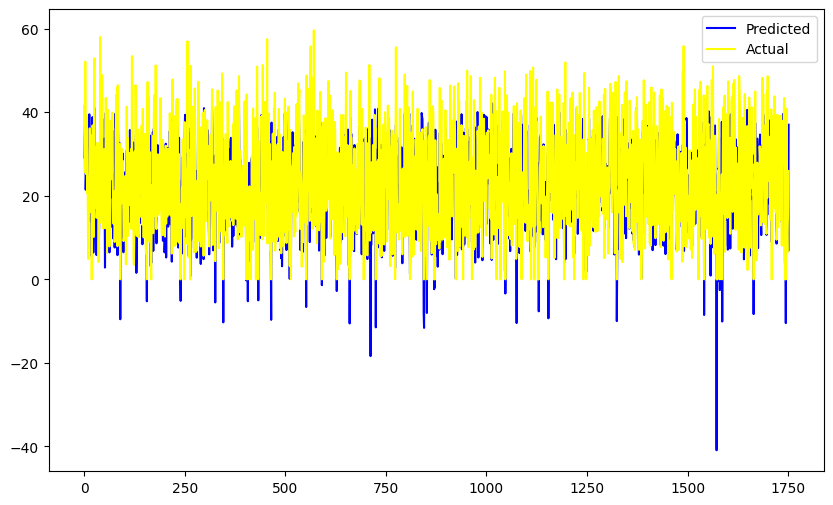

In [ ]:
# Plot the figure with specific colors
plt.figure(figsize=(10, 6))
plt.plot(y_pred_test_ridge, color='blue', label='Predicted')
plt.plot(np.array(y_test), color='yellow', label='Actual')
plt.legend()
plt.show()


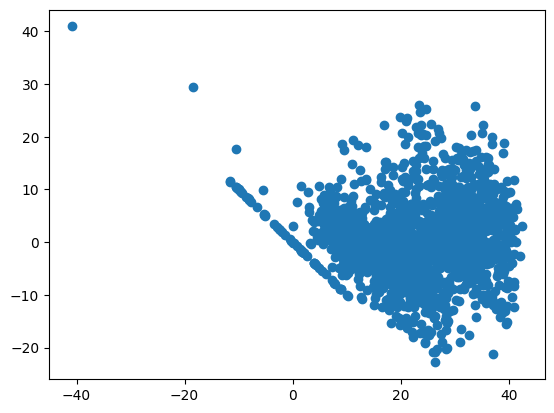

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge))


# **DECISION TREE**

In [ ]:
#import the packages
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor(criterion='friedman_mse', max_depth=8,
                      max_features=9, max_leaf_nodes=100,)
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [ ]:
#get the X_train and X-test value
y_pred_train_d = decision_regressor.predict(X_train)
y_pred_test_d = decision_regressor.predict(X_test)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",decision_regressor.score(X_train,y_train))

#calculate MSE
MSE_d= mean_squared_error(y_train, y_pred_train_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_train, y_pred_train_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score(y_train, y_pred_train_d)
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.8503740645398477
MSE : 23.234283337156313
RMSE : 4.820195362965729
MAE : 3.425048488630018
R2 : 0.8503740645398477
Adjusted R2 : 0.8491680984509345


In [ ]:
#storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)}
training_df=training_df.append(dict1,ignore_index=True)
print(training_df)

                       Model    MAE     MSE   RMSE  R2_score  Adjusted R2
0          Linear Regression  6.702  81.949  9.053     0.472         0.47
1  Dicision tree regression   3.425  23.234  4.820     0.850         0.85


In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_d= mean_squared_error(y_test, y_pred_test_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_test, y_pred_test_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score((y_test), (y_pred_test_d))
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 26.746325120881426
RMSE : 5.1716849402183644
MAE : 3.6187023026397633
R2 : 0.8262284460876564
Adjusted R2 : 0.8248278693721857


In [ ]:
 # storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)}
test_df=test_df.append(dict2,ignore_index=True)
print(test_df)

                       Model    MAE     MSE   RMSE  R2_score  Adjusted R2
0           Lasso Regression  5.668  55.695  7.463     0.638         0.64
1  Dicision tree regression   3.619  26.746  5.172     0.826         0.82


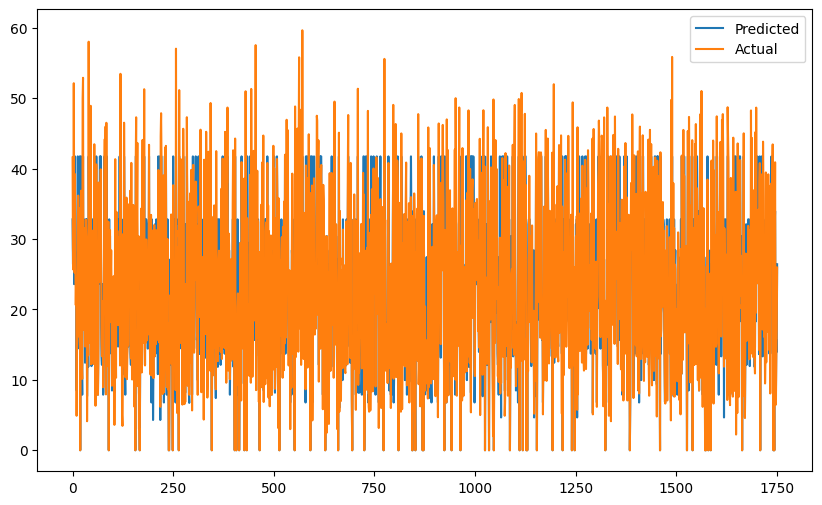

In [ ]:
#Plot the figure
plt.figure(figsize=(10,6))
plt.plot((np.array(y_pred_test_d)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

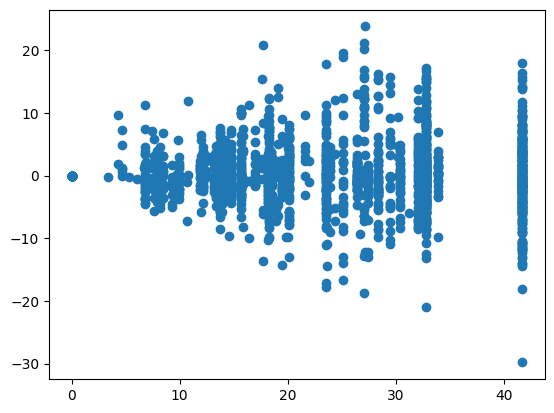

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_d),(y_test)-(y_pred_test_d))

# **RANDOM FOREST**

In [ ]:
#import the packages
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
# Making predictions on train and test data

y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(X_train,y_train))

#calculate MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score(y_train, y_pred_train_r)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.9884640244754367
MSE : 1.7913346578847933
RMSE : 1.33840750815467
MAE : 0.8667512547353722
R2 : 0.9884640244754367
Adjusted R2 : 0.9883710459737994


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
training_df=training_df.append(dict1,ignore_index=True)
print(training_df)

                       Model    MAE     MSE   RMSE  R2_score  Adjusted R2
0          Linear Regression  6.702  81.949  9.053     0.472         0.47
1  Dicision tree regression   3.425  23.234  4.820     0.850         0.85
2  Random forest regression   0.867   1.791  1.338     0.988         0.99


In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 12.518471306662127
RMSE : 3.5381451788560243
MAE : 2.3131784527846913
R2 : 0.9186671738366248
Adjusted R2 : 0.9180116415589695


In [ ]:
from sklearn.linear_model import Ridge

# Create a Ridge Regression model with a specified regularization strength (alpha)
ridge_model = Ridge(alpha=0.1)  # Adjust the alpha value as needed

# Fit the model to your training data
ridge_model.fit(X_train, y_train)

# Make predictions
y_pred = ridge_model.predict(X_test)
y_pred

array([29.19851572, 34.21330718, 36.70288433, ..., 28.20800824,
        6.76687344, 37.02273685])

In [ ]:
#calculate MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 12.518471306662127
RMSE : 3.5381451788560243
MAE : 2.3131784527846913
R2 : 0.9186671738366248
Adjusted R2 : 0.9180116415589695


In [ ]:
df_test=[]
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
test_df=test_df.append(dict2,ignore_index=True)
print(test_df)


                       Model    MAE     MSE   RMSE  R2_score  Adjusted R2
0           Lasso Regression  5.668  55.695  7.463     0.638         0.64
1  Dicision tree regression   3.619  26.746  5.172     0.826         0.82
2  Random forest regression   2.313  12.518  3.538     0.919         0.92


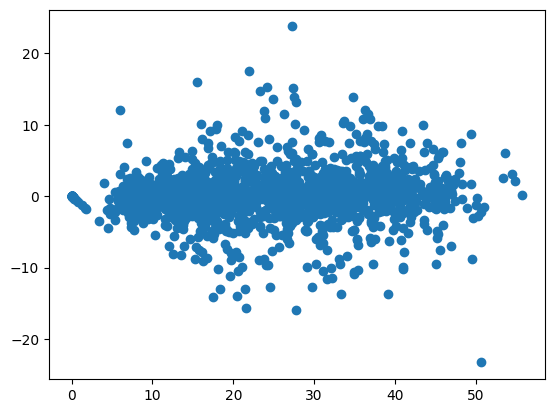

In [ ]:
# Heteroscadacity
plt.scatter((y_pred_test_r),(y_test)-(y_pred_test_r))

In [ ]:
rf_model.feature_importances_

array([0.24336655, 0.27096829, 0.08489006, 0.01183876, 0.01360364,
       0.02079127, 0.04549837, 0.06341168, 0.00135727, 0.05562887,
       0.00294893, 0.16439736, 0.01127613, 0.01002283])

In [ ]:
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
1             Temperature(°C)                0.27
0                        Hour                0.24
11            Functioning Day                0.16
2                 Humidity(%)                0.08
7                Rainfall(mm)                0.06
9                     Seasons                0.06
6     Solar Radiation (MJ/m2)                0.05
5   Dew point temperature(°C)                0.02
3            Wind speed (m/s)                0.01
4            Visibility (10m)                0.01
12                      month                0.01
13           weekdays_weekend                0.01
8               Snowfall (cm)                0.00
10                    Holiday                0.00

In [ ]:
#FIT THE MODEL
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

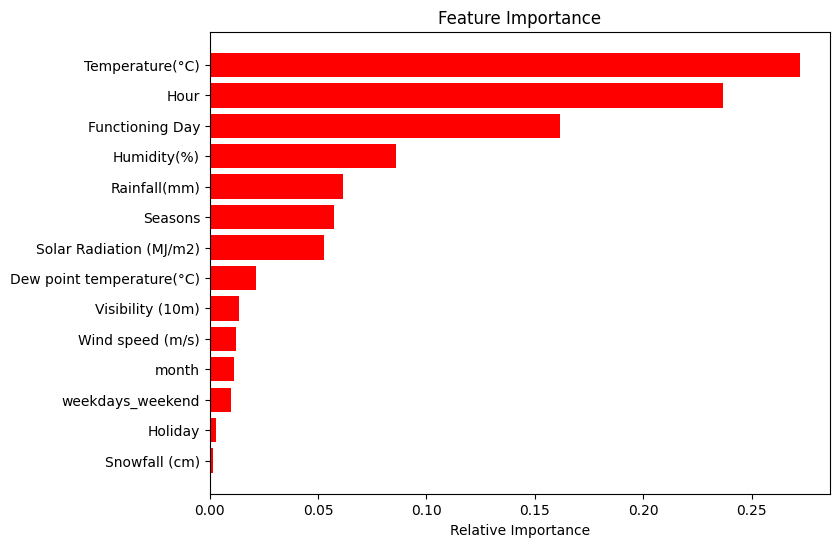

In [ ]:
#Plot the figure
plt.figure(figsize=(8,6))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

In [ ]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

Model    MAE     MSE   RMSE  R2_score  \
Training set 0          Linear Regression  6.702  81.949  9.053     0.472   
             1  Dicision tree regression   3.425  23.234  4.820     0.850   
             2  Random forest regression   0.867   1.791  1.338     0.988   
Test set     0           Lasso Regression  5.668  55.695  7.463     0.638   
             1  Dicision tree regression   3.619  26.746  5.172     0.826   
             2  Random forest regression   2.313  12.518  3.538     0.919   
             3          Lasso regression   6.609  80.579  8.977     0.476   

                Adjusted R2  
Training set 0         0.47  
             1         0.85  
             2         0.99  
Test set     0         0.64  
             1         0.82  
             2         0.92  
             3         0.47

In [ ]:
#Getting all the columns
print("Features of the dataset:")
df.columns

Features of the dataset:


Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'month', 'weekdays_weekend', 'Model',
       'MAE', 'MSE', 'RMSE', 'R2_score', 'Adjusted R2'],
      dtype='object')